### Neural Network Classification with PyTorch 

Classification is predicting a thing, while
regression is predicting a number

In [134]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

### Binary Classification

choose between two things : 
* is it spam?, it is not spam?
* Is this a dog, Is this a cat?
* It is true, is it false?
* is it 0 or is it 1?

### Multiclass classification (Single label)
more than 2 things (choices between multiple food: Sushi , Steak, Pizza,etc...) 

### Multiclass classification (Multilabels)
when there is multiple label option per sample. For example a journal paper can fall into multuple categories at once (deep learning, Artificial intelligence, Neural network)

## 1. make classification data and get ready

In [135]:
import sklearn
from sklearn.datasets import make_circles

In [136]:
#make 1000 samples

n_samples=1000

# create circles

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

#module to generate a synthetic dataset of 1000 samples arranged in two concentric circles.

#noise=0.03 adds a small amount of Gaussian noise to the data, making the points less perfect and more realistic.

#X: a 2D numpy array with shape (1000, 2) containing the coordinates of the samples.

#y: a 1D array with shape (1000,) containing the integer labels (0 or 1) indicating which circle each sample belongs to.

In [137]:
len(X),len(y)

(1000, 1000)

In [138]:
print(f"first five samples of X:{X[:5]}")
print(f"first five samples of y:{y[:5]}")

first five samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first five samples of y:[1 1 1 1 0]


In [139]:
# Mahe dataframe of circ;e data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


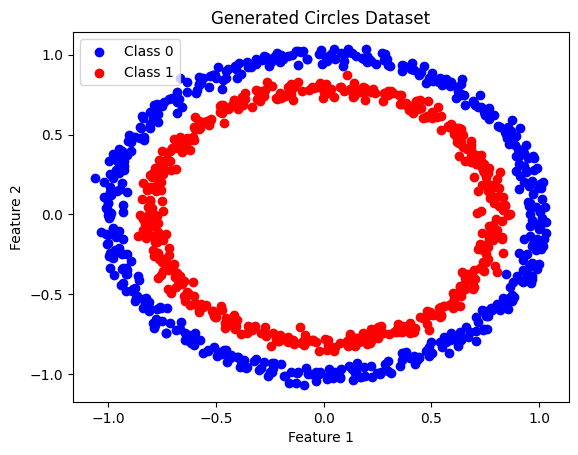

In [140]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.legend()
plt.title("Generated Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


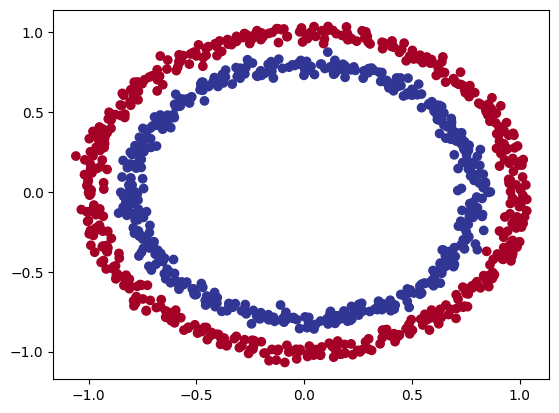

In [141]:
#or
plt.scatter(x=X[:,0],# abscisse x_axis
            y=X[:,1], # ordonnée y_axis
            c=y, #color with labels y
            cmap=plt.cm.RdYlBu)

### Check input and output shapes

In [142]:
print (f" first sample values of X and target y :{X[0]}, {y[0]}    ")
print (f" first sample shape of X and target y :{X[0].shape}, {y[0].shape}    ") # kinda confusing, we need to transform into tensors


 first sample values of X and target y :[0.75424625 0.23148074], 1    
 first sample shape of X and target y :(2,), ()    


### Transform X and y into tensors

In [143]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X.dtype

torch.float32

In [144]:
print (f" first sample values of X and target y :{X[0]}, {y[0]}    ")
print (f" first sample shape of X and target y :{X[0].shape}, {y[0].shape}    ")

 first sample values of X and target y :tensor([0.7542, 0.2315]), 1.0    
 first sample shape of X and target y :torch.Size([2]), torch.Size([])    


In [145]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [146]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,
                                                y,
                                                test_size=0.2, #20% of data will be test and 80% will be train, you can specify train_size=0.8 instead
                                                train_size=0.8, # this line is redundent
                                                random_state=42) #teh euivalent of torch.manual_seed for numpy

In [147]:
type(X_train)

torch.Tensor

In [148]:
X_train.shape

torch.Size([800, 2])

## 2. Building a model

 Let's build a model to classify our blue and red dots.

 To do so, we want to
 1. setup device in agnostic mode (use gpu is available)
 2.  Construct a model (by subclassing `nn.Module`)
 3. Define a loss function and optimizer
 4. create a training and testing loop

In [149]:
# 1. d
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Now that we've set up the device agnostic code
1. subclass nn.Module
2. Create nn.Linear() layers that are capable to handle the shape of our data
3. Define a forward method
4. Instantiate an instance of our model class and send it to the targer 


In [150]:
# 1. Let's create a model that subclass nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
         # 2. create 2 nn.Linear layers capable of handing the shapes of the datas
        self.layers_1=nn.Linear(in_features=2,
                                 out_features=5) #the more layers we have, the more out model has opportunity to learn
        self.layer_2=nn.Linear(in_features=5,
                               out_features=1)
        
    # 3. define a forward method 
    def forward(self,x:torch.tensor)->torch.tensor:
        y1=self.layer_1(x)
        y=self.layer_2(y1)   # x -> layer_1 --> layer_2 --> output
        return y

#4 Instantiate an instance of our model class and send it to the targer 
model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layers_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [151]:
# Let's replication the previous model unisng nn.Sequential because our forward method is simple
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #usinf nn.Sequential
        self.two_linear_layers=nn.Sequential( nn.Linear(in_features=2,out_features=5),
                                             nn.Linear(in_features=5,out_features=1)
                                             ).to(device)
        
   
    # 3 def the forward method using nn.Sequential
    def forward(self,x:torch.tensor)->torch.tensor:
        return self.two_linear_layers(x)

#4 Instantiate an instance of our model class and send it to the targer 
#torch.manual_seed(42)
model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [152]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('two_linear_layers.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('two_linear_layers.1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('two_linear_layers.1.bias', tensor([-0.1213]))])

In [153]:
# Make predictions
with torch.inference_mode():
    untrained_preds=model_0(X_test.to(device))
    print (f"Lenght of prediction: {len(untrained_preds)},Shape:{untrained_preds.shape}   ")
    print(f" Lenght of test samples: {len(X_test)},  Shape:{X_test.shape}")
    print(f"  \nFirst 10 predictions :\n{untrained_preds[:10]}") # they are not in the same format  1 or 0 as expected (as y_test)
    print(f"\nFirst 10 labels:\n{y_test[:10]}") 

Lenght of prediction: 200,Shape:torch.Size([200, 1])   
 Lenght of test samples: 200,  Shape:torch.Size([200, 2])
  
First 10 predictions :
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [154]:
# How to code such a way that y_pred is of the same format as y_test?

**Loss function** For binary classification problems you might/will use **binary cross entropy(BCE)**, `torch.nn.BECwithlogitsLoss()`

 For **Multi-class classification** you might use cross entropy (CE)

 ANd for **optimizers**, two of the most commons are **SGD** and **Adam** from `torch.optim`



In [155]:
# Setup the loss funtion sigmoid activation function
#loss_function=nn.BCELoss() #requires inputs to have gone through the sigmoid activation function prior to input to BCEloss
loss_function=nn.BCEWithLogitsLoss()  # it combines sigmoid activation + nn.BCEloss, and it is more stable than combining with hands

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [156]:
# Calculate accuracy Acc=true positive/(True pos+true Neg)*100. It means out of a 100 examples, what percentage does our model gets right?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item() #torch.eq() returns a boolean tensor(y_true==y_pred), then .sum() counts the number of True values and .item() return an integer.
    acc=(correct/len(y_pred))*100
    return acc


### 3. Train model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw **logits**.
We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).
Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax`. 

In [157]:
with torch.inference_mode():
    y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [158]:
# use the sigmoid acrivaion function on our raw logits to turn them into predictions probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

you can ajust the decision boundaries. like >=0.7 is class 1, ...

In [159]:
with torch.inference_mode():
    #find the predictions labels
    y_preds=torch.round(y_pred_probs)
    # In full(logits --> pred prob --> pred labels)
    y_pred_labels=torch.round(torch.sigmoid(model_0(X_test).to(device)))

    
#get rid of the extra dimension
y_pred_labels.squeeze()

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.])

In [160]:
# 3.2 training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Training loop

# Send data to target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

# Train model for 200 epochs
epochs=200
for epoch in range(epochs):
# 0. Put model in train mode
    model_0.train()
    

    # 1. Forward pass
    y_logits=model_0(X_train).squeeze()
    #y_pred_probs=torch.sigmoid(model_0(X_train))
    y_pred=torch.round(torch.sigmoid(y_logits))


    # 2. Calculate loss/accuracy

    # loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expects prediction probabilities
    #                                y_train)
    loss =loss_function(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                            y_train)
    acc=accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
        

    # 3. Zero gradients
    optimizer.zero_grad()
    

    # 4.Loss backward ( Backpropagation)
    loss.backward()
    

    # 5. Step the optimizer
    optimizer.step()
    

    ### Perform testing every 20 epochs
   

    # Put model in evaluation mode and setup inference context 
    model_0.eval()
    
    # 1. Forward pass
    with torch.inference_mode():
      test_logits=model_0(X_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits))
      
      # 2. Calculate test loss
      test_loss=loss_function(test_logits,y_test)
      test_acc=accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

      # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f},Acc:{acc:2f}% | Test loss: {test_loss:.5f}, test_acc: {test_acc:.3f}%")
      #print(model_0.state_dict())
    

Epoch: 0 | Train loss: 0.69796,Acc:51.875000% | Test loss: 0.69460, test_acc: 57.500%
Epoch: 10 | Train loss: 0.69768,Acc:52.000000% | Test loss: 0.69438, test_acc: 58.000%
Epoch: 20 | Train loss: 0.69742,Acc:52.000000% | Test loss: 0.69418, test_acc: 57.500%
Epoch: 30 | Train loss: 0.69717,Acc:52.000000% | Test loss: 0.69401, test_acc: 56.500%
Epoch: 40 | Train loss: 0.69695,Acc:51.625000% | Test loss: 0.69385, test_acc: 56.500%
Epoch: 50 | Train loss: 0.69675,Acc:51.375000% | Test loss: 0.69370, test_acc: 56.000%
Epoch: 60 | Train loss: 0.69656,Acc:51.375000% | Test loss: 0.69357, test_acc: 56.000%
Epoch: 70 | Train loss: 0.69638,Acc:51.375000% | Test loss: 0.69345, test_acc: 56.500%
Epoch: 80 | Train loss: 0.69621,Acc:51.250000% | Test loss: 0.69334, test_acc: 56.500%
Epoch: 90 | Train loss: 0.69606,Acc:51.375000% | Test loss: 0.69324, test_acc: 55.000%
Epoch: 100 | Train loss: 0.69592,Acc:51.125000% | Test loss: 0.69315, test_acc: 54.000%
Epoch: 110 | Train loss: 0.69579,Acc:51.000

## 4. Make predictions and evaluate the model
From the metrics it looks like our model isn't learning anything...

 So to inspect it let's make some predictions and make them visual!

  In other words, "Visualize, visualize, visualize!"

  TO do so , we're going to import a function called `plot.decision_boundary()`

In [113]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



helper_functions.py already exists, skipping download


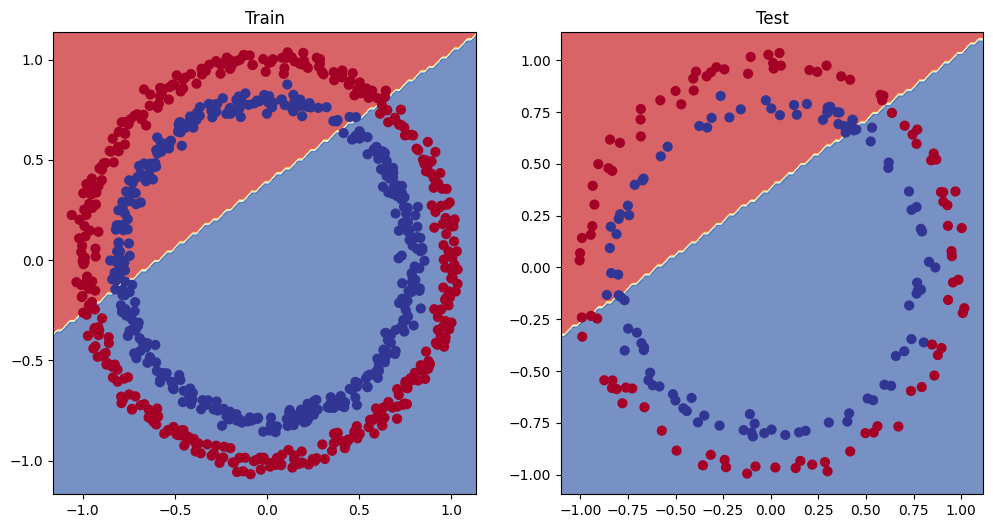

In [161]:
# Plot decision boudary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

# 5. Improving  a model (from a model perspective)

* Add more layers give the model more chances to learn about patterns in the data
* Add more hidden units go from 5 hidden units to 10 hidden units |
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

In [162]:
# Let's replication the previous model unisng nn.Sequential because our forward method is simple
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        #usinf nn.Sequential
        self.three_linear_layers=nn.Sequential( nn.Linear(in_features=2,out_features=10), # we've added layers and units per layers
                                             nn.Linear(in_features=10,out_features=10),
                                             nn.Linear(in_features=10, out_features=1)
                                            ).to(device)
                                            
        
   
    # 3 def the forward method using nn.Sequential
    def forward(self,x:torch.tensor)->torch.tensor:
        return self.three_linear_layers(x)

#4 Instantiate an instance of our model class and send it to the targer 
#torch.manual_seed(42)
model_1=CircleModelV1().to(device)
model_1


CircleModelV1(
  (three_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [163]:
# Setup the loss funtion
loss_function=nn.BCEWithLogitsLoss() 

#Create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [164]:
# Setup the loss funtion
loss_function=nn.BCEWithLogitsLoss() 

#Create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

# 3.2 training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Training loop


# Train model for 1000 epochs

# Send data to target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

epochs=1000
for epoch in range(epochs):
# 0. Put model in train mode
    model_1.train()
    

    # 1. Forward pass
    y_logits=model_1(X_train).squeeze()
    #y_pred_probs=torch.sigmoid(model_0(X_train))
    y_pred=torch.round(torch.sigmoid(y_logits))


    # 2. Calculate loss/accuracy

    # loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expects prediction probabilities
    #                                y_train)
    loss =loss_function(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                            y_train)
    acc=accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
        
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4.Loss backward ( Backpropagation)
    loss.backward()
    

    # 5. Step the optimizer
    optimizer.step()
    

    ### Perform testing every 20 epochs
   

    # Put model in evaluation mode and setup inference context 
    model_1.eval()
    
    # 1. Forward pass
    with torch.inference_mode():
      test_logits=model_1(X_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits))
      
      # 2. Calculate test loss
      test_loss=loss_function(test_logits,y_test)
      test_acc=accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

      # Print out what's happening
    if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f},Acc:{acc:2f}% | Test loss: {test_loss:.5f}, test_acc: {test_acc:.3f}%")
      #print(model_0.state_dict())
    

Epoch: 0 | Train loss: 0.69396,Acc:50.875000% | Test loss: 0.69261, test_acc: 51.000%
Epoch: 50 | Train loss: 0.69322,Acc:49.875000% | Test loss: 0.69324, test_acc: 50.000%
Epoch: 100 | Train loss: 0.69305,Acc:50.375000% | Test loss: 0.69379, test_acc: 48.000%
Epoch: 150 | Train loss: 0.69300,Acc:51.000000% | Test loss: 0.69415, test_acc: 47.000%
Epoch: 200 | Train loss: 0.69299,Acc:51.125000% | Test loss: 0.69437, test_acc: 46.000%
Epoch: 250 | Train loss: 0.69298,Acc:51.625000% | Test loss: 0.69450, test_acc: 46.000%
Epoch: 300 | Train loss: 0.69298,Acc:51.625000% | Test loss: 0.69458, test_acc: 45.000%
Epoch: 350 | Train loss: 0.69298,Acc:51.125000% | Test loss: 0.69462, test_acc: 45.500%
Epoch: 400 | Train loss: 0.69298,Acc:51.125000% | Test loss: 0.69465, test_acc: 46.000%
Epoch: 450 | Train loss: 0.69298,Acc:51.000000% | Test loss: 0.69466, test_acc: 46.000%
Epoch: 500 | Train loss: 0.69298,Acc:51.000000% | Test loss: 0.69467, test_acc: 46.000%
Epoch: 550 | Train loss: 0.69298,Ac

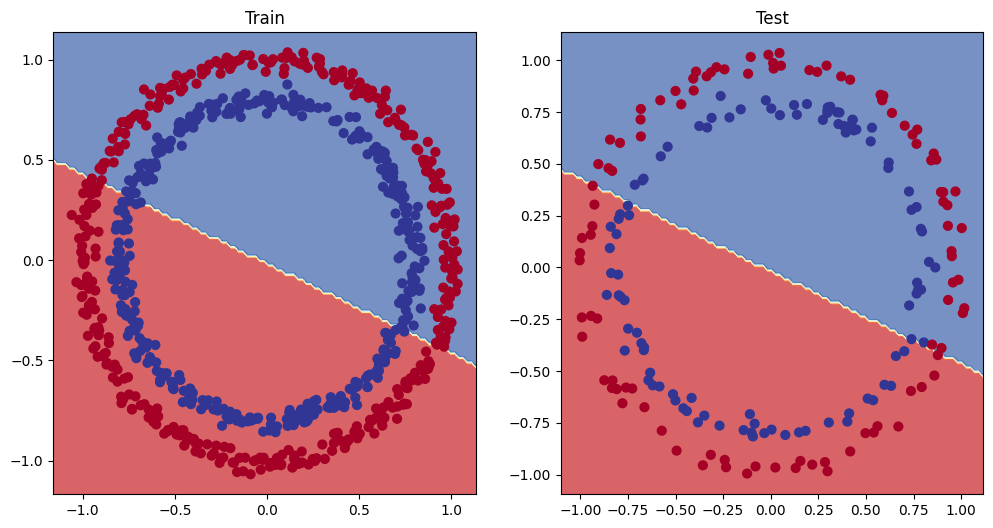

In [165]:
# Plot decision boudary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [ ]:
# Still annoying, this is because we are using Linear regression with non_linear datas

#### 5.1 Troubleshooting: Preparing data to see if our model can fit a straight line

In [229]:
# create some data
weight=0.6
bias=0.4
start=0
end=1
step=0.01

X_reg=torch.arange(start,end,step).unsqueeze(dim=1)
y_reg=X_reg*weight+bias


In [230]:
# Create train and test splits
train_split=int(0.8*len(X_reg))
X_train_reg,y_train_reg=X_reg[:train_split],y_reg[:train_split]
X_test_reg,y_test_reg=X_reg[train_split:],y_reg[train_split:]
X_test_reg.shape,y_test_reg.shape,X_train_reg.shape,y_train_reg.shape

(torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([80, 1]))

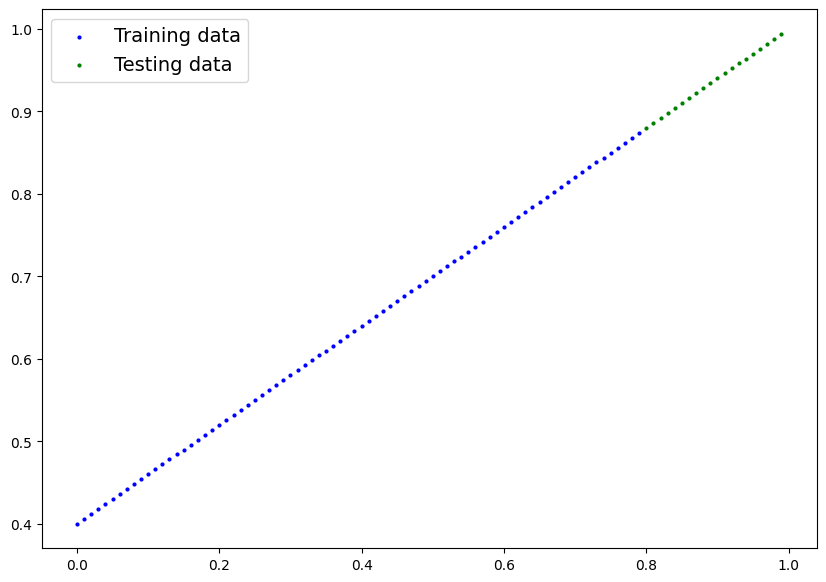

In [231]:
plot_predictions(test_data=X_test_reg,
                 train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_labels=y_test_reg)

In [232]:
# Same architechture as model1
model2=nn.Sequential(nn.Linear(in_features=1,out_features=10), # we've added layers and units per layers
                    nn.Linear(in_features=10,out_features=10),
                    nn.Linear(in_features=10, out_features=1)
                    ).to(device)
model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [233]:
loss_fn=nn.MSELoss() #nn.L1Loss() the mean square function is best loss function for linear regression
optimizer=torch.optim.SGD(params=model2.parameters(),
                          lr=0.01)

In [234]:
# 3.2 training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Training loop

# Send data to target device
X_train_reg=X_train_reg.to(device)
y_train_reg=y_train_reg.to(device)
X_test_reg=X_test_reg.to(device)
y_test_reg=y_test_reg.to(device)

# Train model for 1000 epochs
epochs=1000
for epoch in range(epochs):
# 0. Put model in train mode
    model2.train()
    
    # 1. Forward pass
    y_pred=model2(X_train_reg)


    # 2. Calculate loss/accuracy

    loss =loss_fn(y_pred,y_train_reg)
    
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4.Loss backward ( Backpropagation)
    loss.backward()
    

    # 5. Step the optimizer
    optimizer.step()


    # Put model in evaluation mode and setup inference context 
    model2.eval()
    
    # 1. Forward pass
    with torch.inference_mode():
      test_pred=model2(X_test_reg)
      
      # 2. Calculate test loss
      test_loss=loss_fn(test_pred,y_test_reg)

      # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")
print(model2.state_dict())
    

Epoch: 0 | Train loss: 0.67742 | Test loss: 0.79828
Epoch: 100 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 200 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 300 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 400 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 500 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 600 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 700 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 800 | Train loss: 0.00000 | Test loss: 0.00000
Epoch: 900 | Train loss: 0.00000 | Test loss: 0.00000
OrderedDict([('0.weight', tensor([[ 0.7595],
        [ 0.8377],
        [-0.2539],
        [ 0.9256],
        [-0.2221],
        [ 0.2158],
        [-0.5048],
        [ 0.5979],
        [ 0.8903],
        [-0.7365]])), ('0.bias', tensor([ 0.8570,  0.2056,  0.6915,  0.1522,  0.4750, -0.1074,  0.7276,  0.1735,
        -0.4457,  0.2481])), ('1.weight', tensor([[-0.0805, -0.0072, -0.0944,  0.2388, -0.2281, -0.1480, -0.0591, -0.1678,
          0.0248, -0.3153],
 

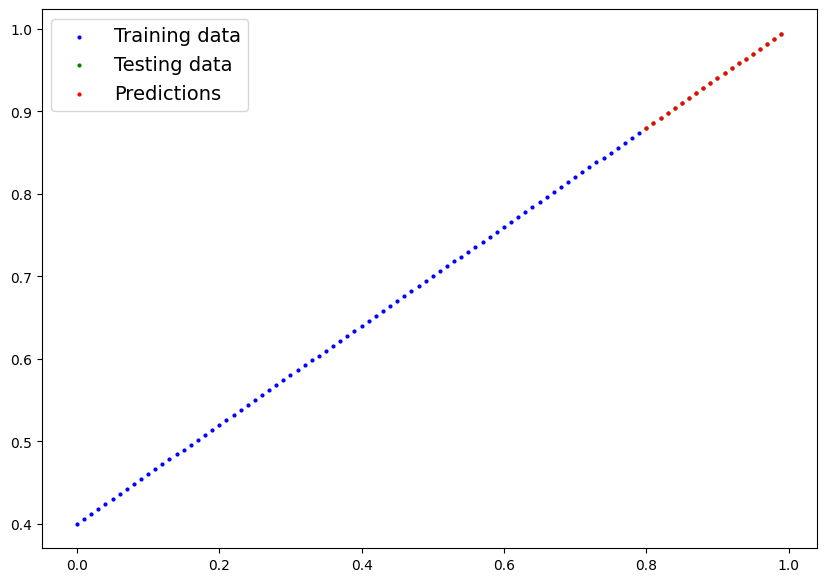

In [236]:
# Make some predictions
with torch.inference_mode():
    y_preds_reg=model2(X_test_reg)

plot_predictions(test_data=X_test_reg,
                 train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_labels=y_test_reg,
                 predictions=y_preds_reg)
    

## 6. Non linear activation functions

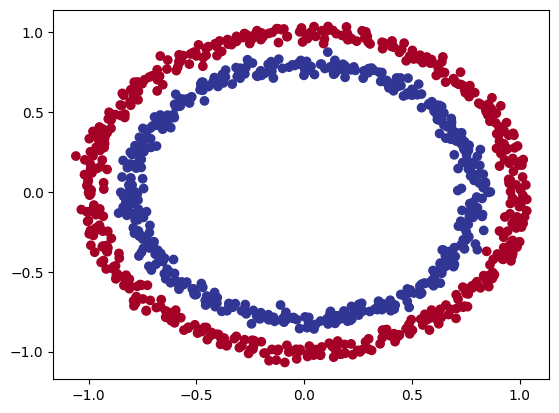

In [241]:
#make 1000 samples

n_samples=1000

# create circles

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)
#plot
plt.scatter(x=X[:,0],# abscisse x_axis
            y=X[:,1], # ordonnée y_axis
            c=y, #color with labels y
            cmap=plt.cm.RdYlBu)

In [242]:
# convert data to tensors
from sklearn.model_selection import train_test_split
#turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

#Split into train and test sets

X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,test_size=0.2,
                                                random_state=42)
X_train[:5], y[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 1., 1., 1., 0.]))

### 6.2 Building a model with non-linearity

In [243]:
# Build a model with non-linear activation function
from torch import nn
class circlemodelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()
    
    def forward(self,x):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=circlemodelV2().to(device)
model_3

circlemodelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [244]:
# Setup the loss funtion
loss_function=nn.BCEWithLogitsLoss() 

#Create an optimizer
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)


In [245]:

# 3.2 training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Training loop


# Train model for 1000 epochs

# Send data to target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

epochs=1000
for epoch in range(epochs):
# 0. Put model in train mode
    model_3.train()
    

    # 1. Forward pass
    y_logits=model_3(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))


    # 2. Calculate loss/accuracy

    # loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expects prediction probabilities
    #                                y_train)
    loss =loss_function(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                            y_train)
    acc=accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
        
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4.Loss backward ( Backpropagation)
    loss.backward()
    

    # 5. Step the optimizer
    optimizer.step()
    

    ### Perform testing every 20 epochs
   

    # Put model in evaluation mode and setup inference context 
    model_3.eval()
    
    # 1. Forward pass
    with torch.inference_mode():
      test_logits=model_3(X_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits))
      
      # 2. Calculate test loss
      test_loss=loss_function(test_logits,y_test)
      test_acc=accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

      # Print out what's happening
    if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f},Acc:{acc:2f}% | Test loss: {test_loss:.5f}, test_acc: {test_acc:.3f}%")
      #print(model_3.state_dict())
    

Epoch: 0 | Train loss: 0.69295,Acc:50.000000% | Test loss: 0.69319, test_acc: 50.000%
Epoch: 50 | Train loss: 0.69181,Acc:58.250000% | Test loss: 0.69177, test_acc: 58.000%


Epoch: 100 | Train loss: 0.69115,Acc:52.875000% | Test loss: 0.69102, test_acc: 52.500%
Epoch: 150 | Train loss: 0.69050,Acc:52.875000% | Test loss: 0.69027, test_acc: 55.000%
Epoch: 200 | Train loss: 0.68977,Acc:53.375000% | Test loss: 0.68940, test_acc: 55.000%
Epoch: 250 | Train loss: 0.68894,Acc:53.500000% | Test loss: 0.68840, test_acc: 56.000%
Epoch: 300 | Train loss: 0.68795,Acc:53.000000% | Test loss: 0.68723, test_acc: 56.000%
Epoch: 350 | Train loss: 0.68676,Acc:52.625000% | Test loss: 0.68587, test_acc: 56.500%
Epoch: 400 | Train loss: 0.68517,Acc:52.750000% | Test loss: 0.68411, test_acc: 56.500%
Epoch: 450 | Train loss: 0.68326,Acc:52.750000% | Test loss: 0.68198, test_acc: 56.000%
Epoch: 500 | Train loss: 0.68102,Acc:52.750000% | Test loss: 0.67941, test_acc: 56.500%
Epoch: 550 | Train loss: 0.67837,Acc:53.375000% | Test loss: 0.67641, test_acc: 56.000%
Epoch: 600 | Train loss: 0.67515,Acc:54.500000% | Test loss: 0.67285, test_acc: 56.000%
Epoch: 650 | Train loss: 0.67133

In [247]:
## 6.4 Evaluate a model trained with non-linear activation functions
model_3.eval()
with torch.inference_mode():
    y_pred=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_pred[:10]


tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.])

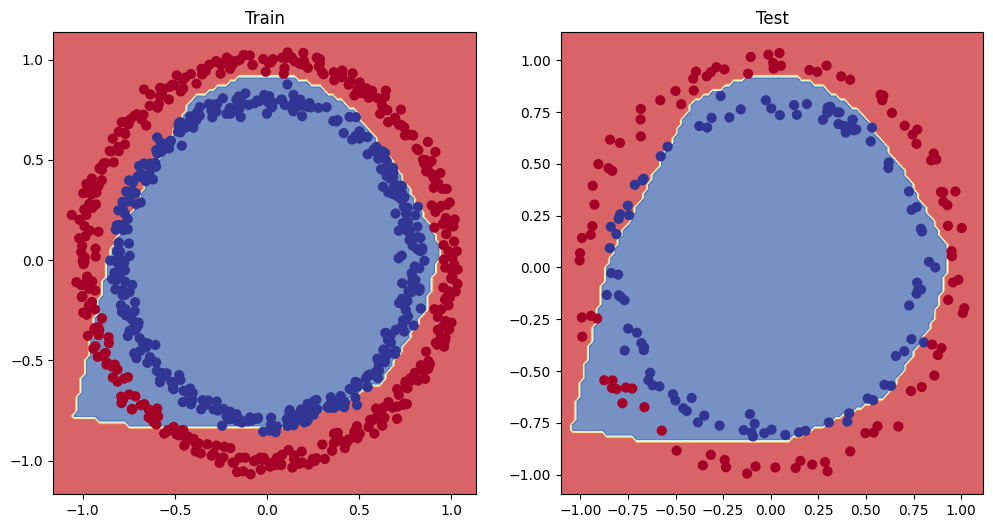

In [248]:
# Plot decision boudary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## 7 Replicating non-linear activation functions

In [252]:
# Create a tensor
A=torch.arange(-20,20,2,dtype=torch.float)
A.dtype

torch.float32

In [253]:
A

tensor([-20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,
          4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.])

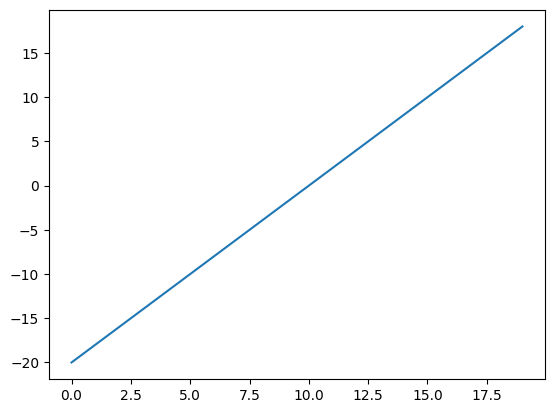

In [254]:
# Visualize the tensor
plt.plot(A)

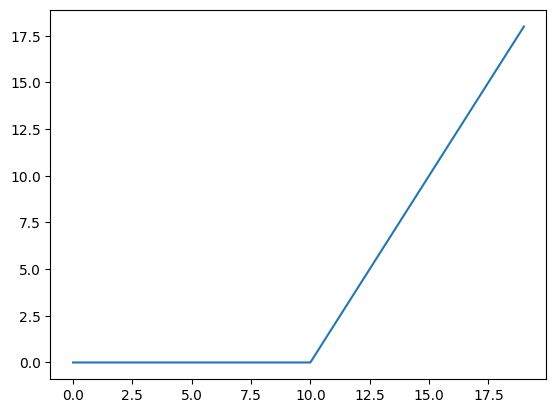

In [255]:
plt.plot(torch.relu(A)) #relu(x)=max(0,x)

In [256]:
def relu(x:torch.tensor)->torch.tensor:
    return torch.maximum(torch.tensor(0),x)
relu(A)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  6.,
         8., 10., 12., 14., 16., 18.])

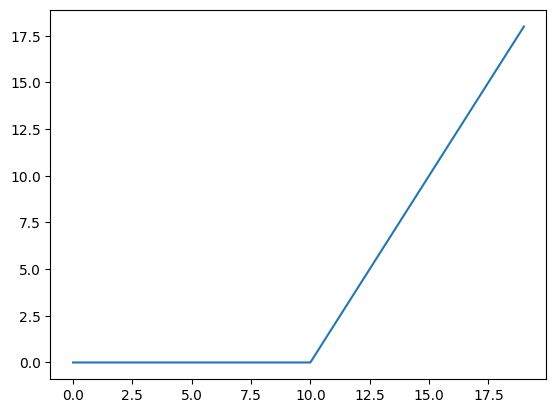

In [257]:
plt.plot(relu(A))

In [258]:
def sigmoid(x:torch.tensor)->torch.tensor:
    return 1/(1+torch.exp(-x))

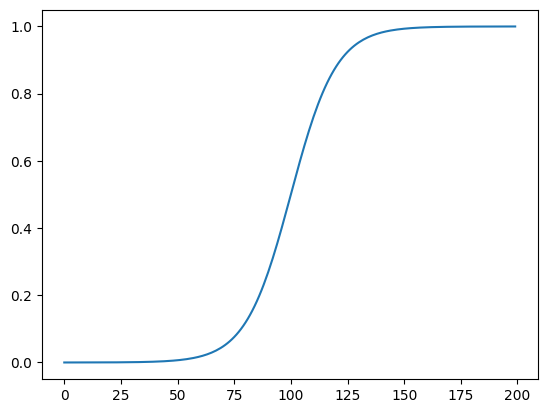

In [259]:
plt.plot(sigmoid(torch.arange(-10,10,0.1)))

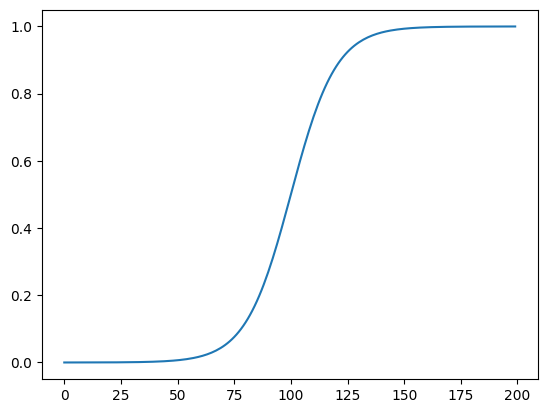

In [260]:
plt.plot(torch.sigmoid(torch.arange(-10,10,0.1)))

## 8. putting it all together with a multiclass classification problem

instead of `nn.sigmoid` for binary clasification, we use `nn.sofmax` for multiclass classification.
for the loss function, instead of `nn.BCE` we use `nn.CE`